<br>

# 🏦 **BANKING MARKETING CAMPAING** 🏦

**LOGISTIC REGRESSION PROJECT**

## **INDEX**

- **STEP 1: PROBLEM DEFINITION**
- **STEP 2: DATA COLLECTION, EXPLORATION, AND CLEANING**
- **STEP 3: UNIVARIATE VARIABLE ANALYSIS**
- **STEP 4: MULTIVARIATE VARIABLE ANALYSIS**
- **STEP 5: FEATURE ENGINEERING**
- **STEP 6: FEATURE SELECTION**
- **STEP 7: MACHINE LEARNING**
- **STEP 8: CONCLUSIONS**

<br>



### **STEP 1: PROBLEM DEFINITION AND DATA COLLECTION**

- 1.1. Problem Definition
- 1.2. Library Importing
- 1.3. Data Collection

**1.1. PROBLEM DEFINITION**

Long-term deposits allow banks to hold money for a specific period of time, allowing the bank to use that money to enhance its investments. 

The bank conducts phone-based outreach to customers as part of marketing campaigns aimed at promoting long-term deposits. The objective is to improve the efficiency of these efforts by focusing on customers with the highest likelihood of subscribing to and retaining the product.

**Project Objective:** Develop a classification model to predict whether a customer will opt for a long-term deposit using the data provided by the bank.

**OPTIMIZING CAMPAIGN EFFECTIVENESS:**

**Customer Demographics and Behavior:**
- What age ranges show the highest likelihood of subscribing to long-term deposits?
- How do occupation (job) and education level relate to the decision to open a long-term deposit?
- Are customers with existing personal loans or mortgages less inclined to commit to long-term deposits?


**Analysis of Marital Status and Demographics:**
- How do marital statuses (married, single, or others) compare in terms of adherence rates?
- Do specific age groups or marital statuses display a stronger preference for long-term deposit products?


**Contact Methods and Conversion Likelihood:**
- Which communication channel delivers the best results?
- How does call duration impact conversion rates? Is there an ideal call length that maximizes success?
- What is the relationship between the number of prior campaign contacts (campaign, previous) and the likelihood of conversion?
Seasonality and Timing:
- Does the timing of contact, such as the month or day of the week, influence the likelihood of success?
- Are adherence rates consistent across different months or days of the week, or do they vary?


**Macroeconomic Indicators and Customer Decisions:**
- How do broader economic factors, like the 3-month EURIBOR rate (euribor3m) or employment variation rate (emp.var.rate), impact customers’ decisions?
- Is there a connection between consumer confidence (cons.conf.idx) and customers’ readiness to commit to long-term deposits?


**Insights from Past Campaigns:**
- What role does the outcome of prior campaigns (poutcome) play in shaping customers’ decisions?
- Are customers who were contacted in earlier campaigns more likely to respond positively in the current one?

**Customer Profiles and Propensity for Adherence:**
- Is there a common set of traits shared by customers who choose long-term deposits?
- How do factors like age, marital status, occupation, and education level correlate with product adoption?
- Can we identify patterns among customers with a higher tendency to accept long-term investment products?

**1.2. LIBRARY IMPORTING**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings

# To supress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

**1.3. DATA COLLECTION**

In [2]:
# Import a CSV file with ';' delimiter from the given URL into a Pandas DataFrame named 'bank'
pd.options.display.max_columns=None  #Configure pandas to display all DataFrame columns when printing
bank = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Export DataFrame 'bank' to a local CSV file
bank.to_csv("../data/raw/bank_data.csv", index=False)

<br>

## **STEP 2: DATA EXPLORATION AND CLEANING**

- 2.1. Exploration: Understanding the Features
- 2.2. Identifying null values in each feature
- 2.3. Eliminating Irrelevant Information

**2.1. EXPLORATION: UNDERSTANDING THE FEATURES**

- `age.` Age of customer (numeric)
- `job.` Type of job (categorical)
- `marital.` Marital status (categorical)
- `education.` Level of education (categorical)
- `default.` Do you currently have credit (categorical)
- `housing.` Do you have a housing loan (categorical)
- `loan.` Do you have a personal loan? (categorical)
- `contact.` Type of contact communication (categorical)
- `month.` Last month in which you have been contacted (categorical)
- `day_of_week.` Last day on which you have been contacted (categorical) 
- `duration.` Duration of previous contact in seconds (numeric)
- `campaign.` Number of contacts made during this campaign to the customer (numeric)
- `pdays.` Number of days that elapsed since the last campaign until the customer was contacted (numeric)
- `previous.` Number of contacts made during the previous campaign to the customer (numeric)
- `poutcome.` Result of the previous marketing campaign (categorical)
- `emp.var.rate.` Employment variation rate. Quarterly indicator (numeric)
- `cons.price.idx.` Consumer price index. Monthly indicator (numeric)
- `cons.conf.idx.` Consumer confidence index. Monthly indicator (numeric)
- `euribor3m.` EURIBOR 3-month rate. Daily indicator (numeric)
- `nr.employed.` Number of employees. Quarterly indicator (numeric)
- `y.` TARGET. Whether the customer takes out a long-term deposit or not (categorical)

In [4]:
# Dataset Dimensions
print("\033[1mDATASET DIMENSIONS:\033[0m")
print(bank.shape)

DATASET DIMENSIONS:
(41188, 21)


In [5]:
# Dataset informations and Data Types.  

print("\n\033[1mDATA TYPES:\033[0m\n")
print(bank.info())


DATA TYPES:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   4

In [6]:
# Obtaining the description of the dataset's statistics:
bank.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [7]:
# Analyze the types of information we have
print("Data types present in the dataset:", bank.dtypes.unique())

# Identify numerical and categorical variables
numerical_vars = bank.select_dtypes(include=['float', 'int']).columns
categorical_vars = bank.select_dtypes(include=['O']).columns

# Count the number of numerical and categorical variables
num_numerical_vars = len(numerical_vars)
num_categorical_vars = len(categorical_vars)

# Display results
print(f"Number of categorical variables: {num_categorical_vars}")
print("Categorical variables:", list(categorical_vars))
print('\n')
print(f"Number of numerical variables: {num_numerical_vars}")
print("Numerical variables:", list(numerical_vars))

Data types present in the dataset: [dtype('int64') dtype('O') dtype('float64')]
Number of categorical variables: 11
Categorical variables: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


Number of numerical variables: 10
Numerical variables: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


**OBSERVATIONS:**

- This DataFame is composed by 41.188 rows and 21 columns (variables).
- There are no variables with null values.
- The data has:

**11 CATEGORICAL VARIABLES:** `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `day_of_week`, `poutcome` and `y`


**10 NUMERICAL VARIABLES:**  `age`, `duration`, `campaign`, `pdays`, `previous`, `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m` and `nr.employed`


<br>

**2.2. IDENTIFYING NULL VALUES IN EACH FEATURE**

In [8]:
# Transforming 'unknown' and 'nonexistent' values into NaN for consistent handling of missing data
bank.replace(['unknown', 'nonexistent'], np.nan, inplace=True)

# Display the modified DataFrame
bank.head()  

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


**2.3. ELIMINATING IRRELEVANT INFORMATION**

In [9]:
# Display initial row count
initial_row_count = bank.shape[0]

# Check and remove duplicates
num_duplicates = bank.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    bank = bank.drop_duplicates()
    print(f"Duplicate rows have been removed. Row count reduced from {initial_row_count} to {bank.shape[0]}.")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 12
Duplicate rows have been removed. Row count reduced from 41188 to 41176.


All features will be preserved.
During the preliminary stages of constructing a classification model to predict long-term deposit subscription, I decided to preserve all features as their individual contributions to the model's performance remain unknown.

<br>

<br>

## **STEP 3: ANALYSIS OF UNIVARIATE VARIABLES**

- 3.1. Analysis of categorical variables
- 3.2. Analysis of numerical variables

**3.1. ANALYSIS OF CATEGORICAL VARIABLES**

In [10]:
# Split the original dataframe by numerical and categorical values

num = ['int64', 'float64']
cat = ['O']

bank_numerical = bank.select_dtypes(num)
bank_categorical = bank.select_dtypes(cat)

In [11]:
bank_categorical.head(3)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,NaN,no
1,services,married,high.school,NaN,no,no,telephone,may,mon,NaN,no
2,services,married,high.school,no,yes,no,telephone,may,mon,NaN,no


In [12]:
def plot_categorical_variables(bank_categorical, hue='y'):
    """
    Plots count charts for all categorical variables in `bank_categorical` using a 3-column layout.

    Parameters:
    - bank_categorical: DataFrame containing only the categorical columns to analyze.
    - hue: Color variable for the columns (optional), like the target variable if relevant.
    """
    
    # Get all categorical columns from `bank_categorical`
    categorical_columns = bank_categorical.columns.tolist()

    # Configura o layout dos subplots para ter 3 colunas
    num_cols = 3
    num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # Calcula o número de linhas necessárias
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 5 * num_rows))

    # Flatten the axes array to make it easier to iterate
    axes = axes.flatten()

    # Loop to create count plots for each categorical variable
    for i, col in enumerate(categorical_columns):
        sns.countplot(ax=axes[i], data=bank_categorical, x=col, hue=hue)
        axes[i].set_title(f"{col}", fontsize=14, fontweight='bold')
        axes[i].tick_params(axis='x', rotation=90)

    # Remove extra axes if there are fewer columns than subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

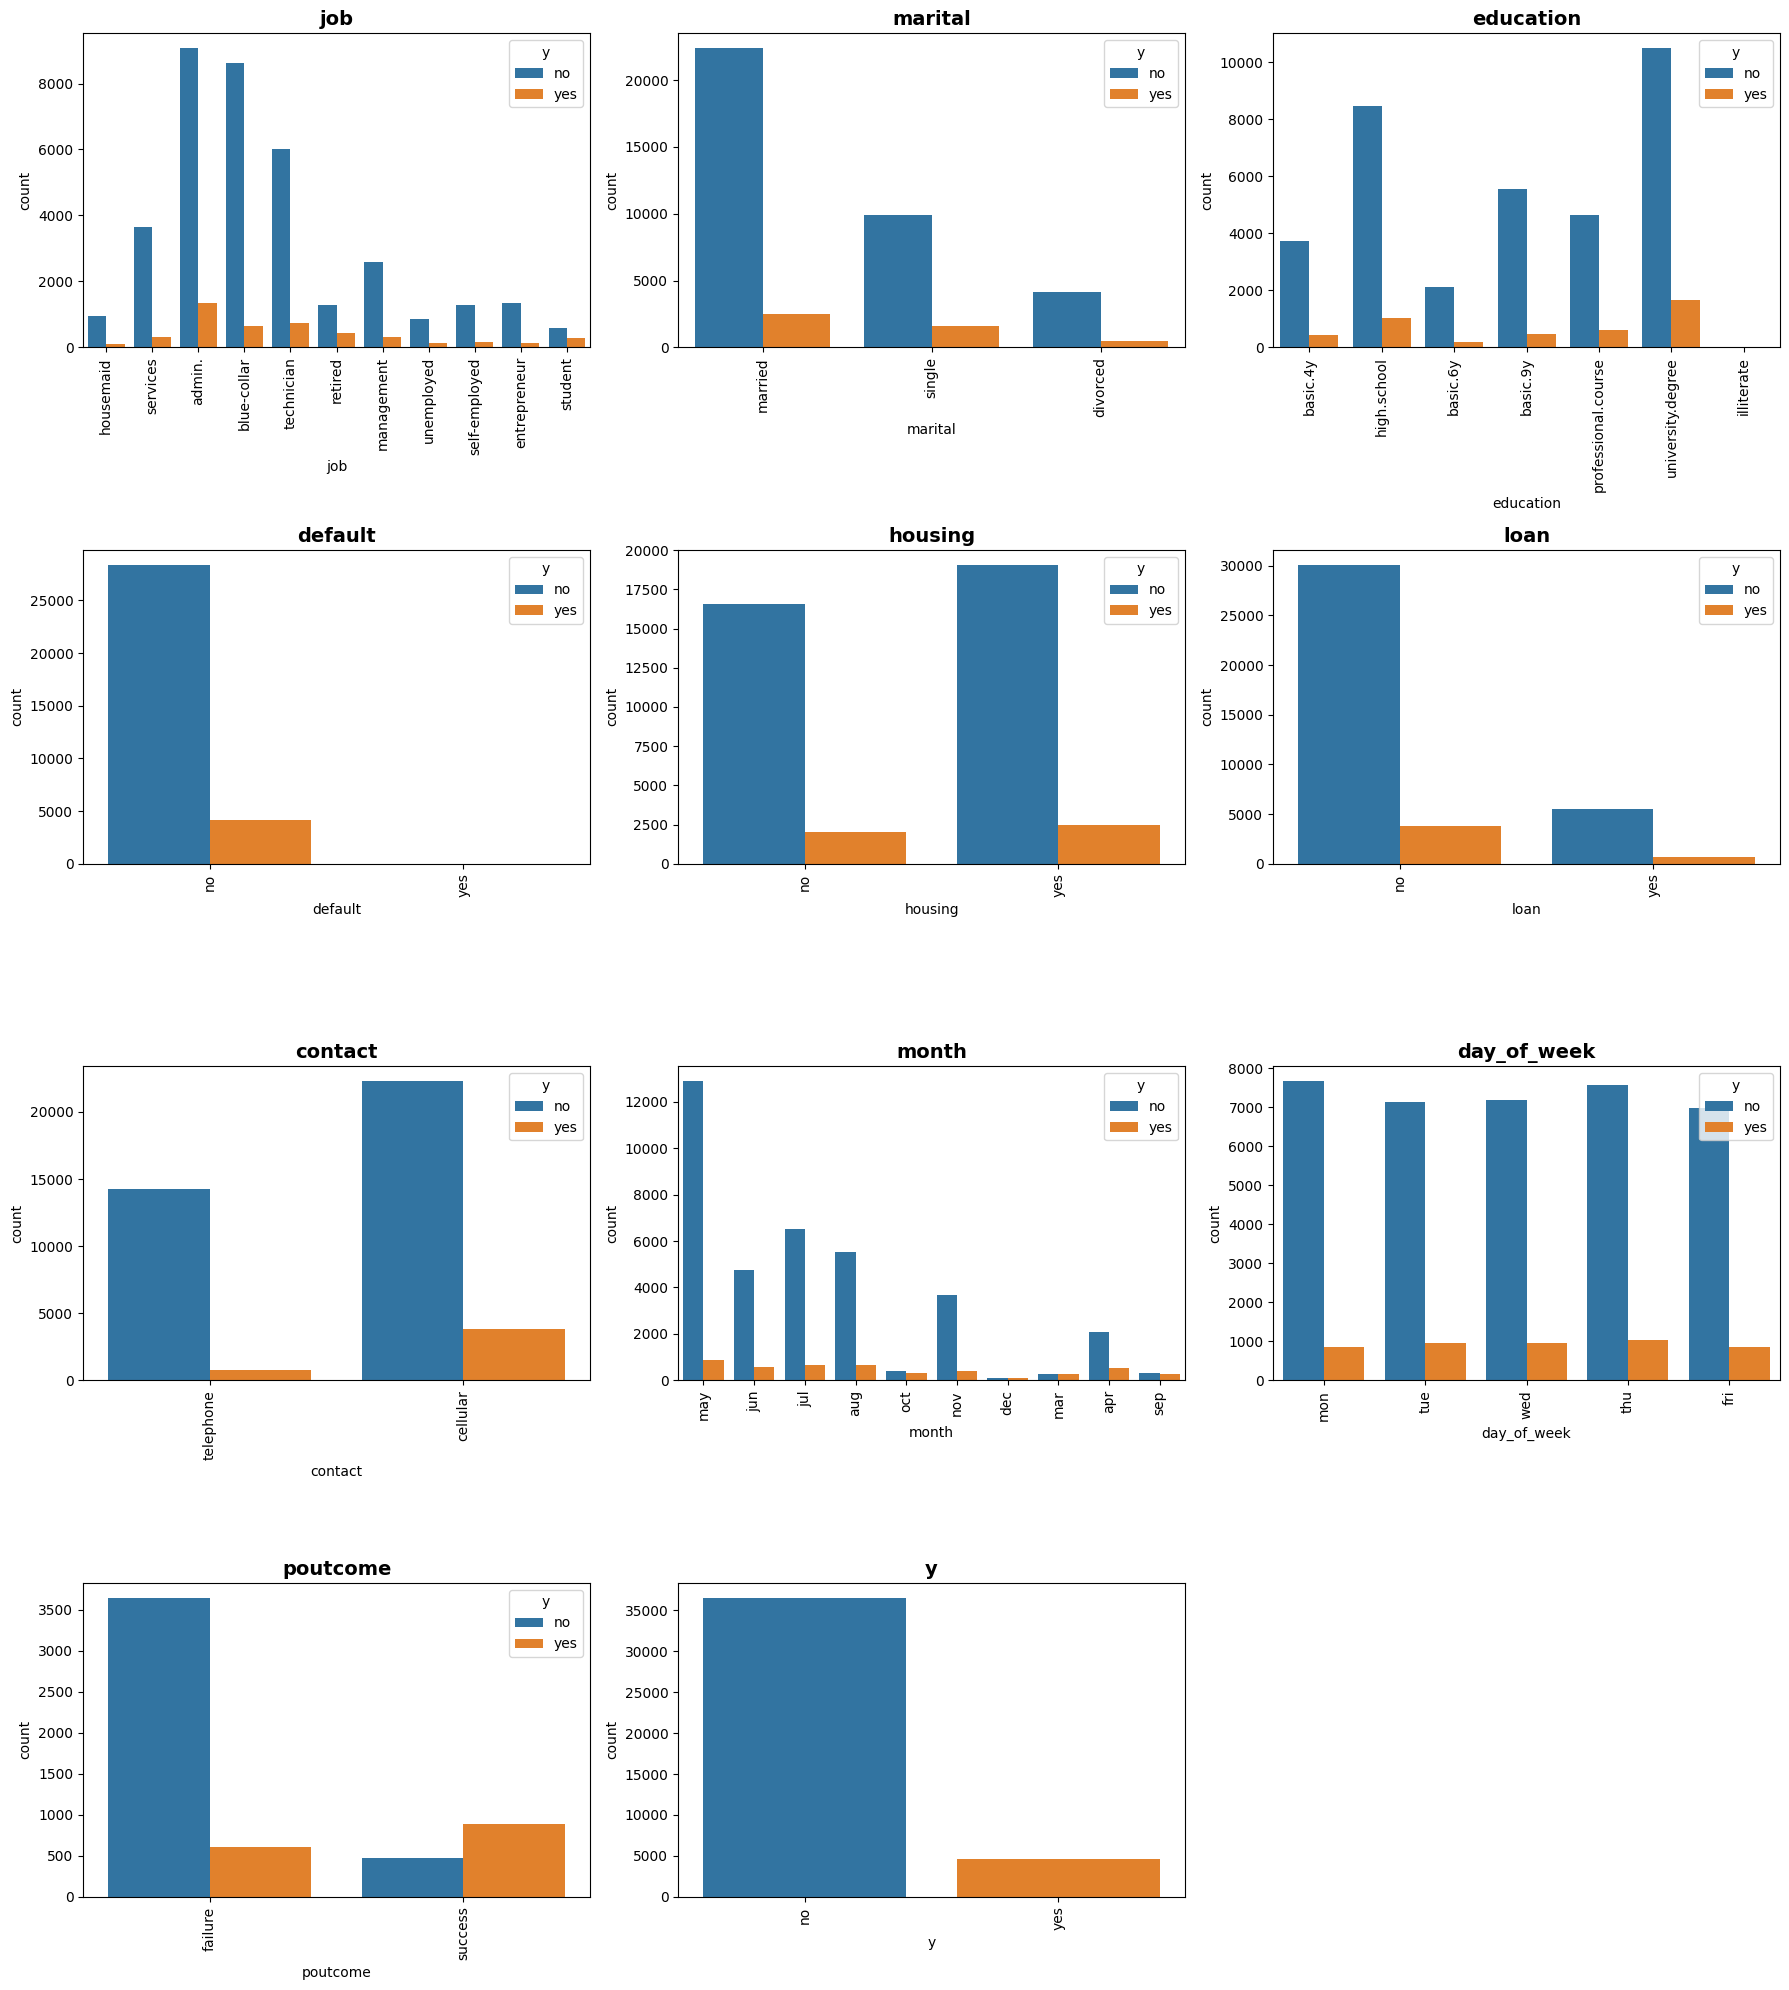

In [13]:
plot_categorical_variables(bank_categorical, hue='y')

**OBSERVATIONS:**

By visualizing each variable's distribution through histograms, we can identify the following:

`job`: The adoption rate varies across professions. Clients in roles like "admin," "blue-collar," and "technician" dominate the dataset, but categories with fewer clients, such as "student" and "housemaid," exhibit slightly higher adoption rates, suggesting potential interest from these groups.

`marital`: The majority of clients are married, followed by singles. However, singles and divorced individuals display slightly higher adoption rates compared to married clients.

`education`: Most clients possess secondary or tertiary education, with similar adoption rates across these levels. There's no apparent relationship between education and adoption.

`default` The majority of clients have no active credit (default). Clients with defaults show a significantly lower adoption rate, indicating a negative influence of credit status on adoption.

`loan`: While most clients have a housing loan, those without one exhibit a slightly higher adoption rate. Clients without a mortgage might be more receptive to the product.

**Note:** Similar to housing loans, most clients lack personal loans, and the adoption rate is lower among those with loans. This suggests a potential reluctance to adopt due to existing financial commitments.
Note: Customers with no active credit, no mortgage, and no personal loan show a slightly higher propensity to adopt the long-term banking product. This profile might indicate that clients with fewer financial obligations are more inclined to accept the new product, providing valuable insights for targeted marketing campaigns.

`contact`: Most contacts occur via mobile phone, which also correlates with a higher adoption rate compared to landlines. Mobile contacts seem more effective.

`month`: May sees the highest contact volume, but months like March and December, despite fewer contacts, show slightly higher adoption rates, suggesting potential seasonal influences on adoption decisions.

`day_of_week`: There's no significant variation in adoption rates across weekdays, indicating minimal impact of contact day on adoption.

`poutcome`: Clients with successful past campaign outcomes exhibit a significantly higher adoption rate in this campaign, suggesting that previous campaign performance can be a strong indicator for future targeting.

`y` (**target**): Most clients did not opt for the long-term deposit, reflecting a low overall adoption rate. This indicates either limited product appeal or potential areas for improvement in segmentation strategies.



**ELIMINATING IRRELEVANT INFORMATION**


Considering the aforementioned factors, it was determined that the following outliers should be removed:

- `month`
- `day_of_week`

These variables, primarily related to scheduling and not customer characteristics, are unlikely to significantly impact the decision to subscribe to a long-term deposit.

<br>

**3.2. ANALYSIS OF NUMERICAL VARIABLES**

In [14]:
# Displays the first 3 rows of the DataFrame 'bank_numerical'
bank_numerical.head(3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [15]:
def plot_numerical_variables(bank_numerical, hue=None): 
    """
    Plots histograms and boxplots for all numeric variables in `bank_numerical`
    using a 2-column layout with a fixed color palette for visual consistency.

    Parameters:
    - bank_numerical: DataFrame containing only the numerical columns to analyze.
    - hue: Column name for hue (optional). If provided, it must exist in `bank_numerical`.
    """
    # Get all numerical columns from `bank_numerical`
    numerical_columns = bank_numerical.columns.tolist()

    # Calculate the required number of rows
    num_vars = len(numerical_columns)
    num_rows = (num_vars + 1) // 2  # Divided by 2 columns, rounding up

    # Set up the layout of subplots
    fig, axes = plt.subplots(num_rows * 2, 2, figsize=(10, num_rows * 4))
    plt.suptitle('Distribution of Numerical Variables', fontsize=16, y=1.02)
    print()
    
    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Define a fixed color palette
    palette = sns.color_palette("colorblind", num_vars)

    # Loop to create histograms and boxplots for each numerical variable
    for i, col in enumerate(numerical_columns):
        color = palette[i % len(palette)]  # Ensures the color index stays within the palette length
        
        # Histogram with or without hue
        sns.histplot(ax=axes[i * 2], data=bank_numerical, x=col, hue=hue if hue in bank_numerical.columns else None, color=color)
        axes[i * 2].set_title(col.capitalize(), fontweight='bold')  # Set the title in bold for the histogram
        
        # Boxplot (without hue)
        sns.boxplot(ax=axes[i * 2 + 1], data=bank_numerical, x=col, color=color)
        axes[i * 2 + 1].set_title(col.capitalize(), fontweight='bold')  # Set the title in bold for the boxplot
        axes[i * 2 + 1].set(xlabel=None)  # Remove x label from boxplot for consistency

    # Remove extra axes if there is an odd number of variables
    for j in range(i * 2 + 2, len(axes)):
        fig.delaxes(axes[j])

    # Adjust the layout to avoid overlapping
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

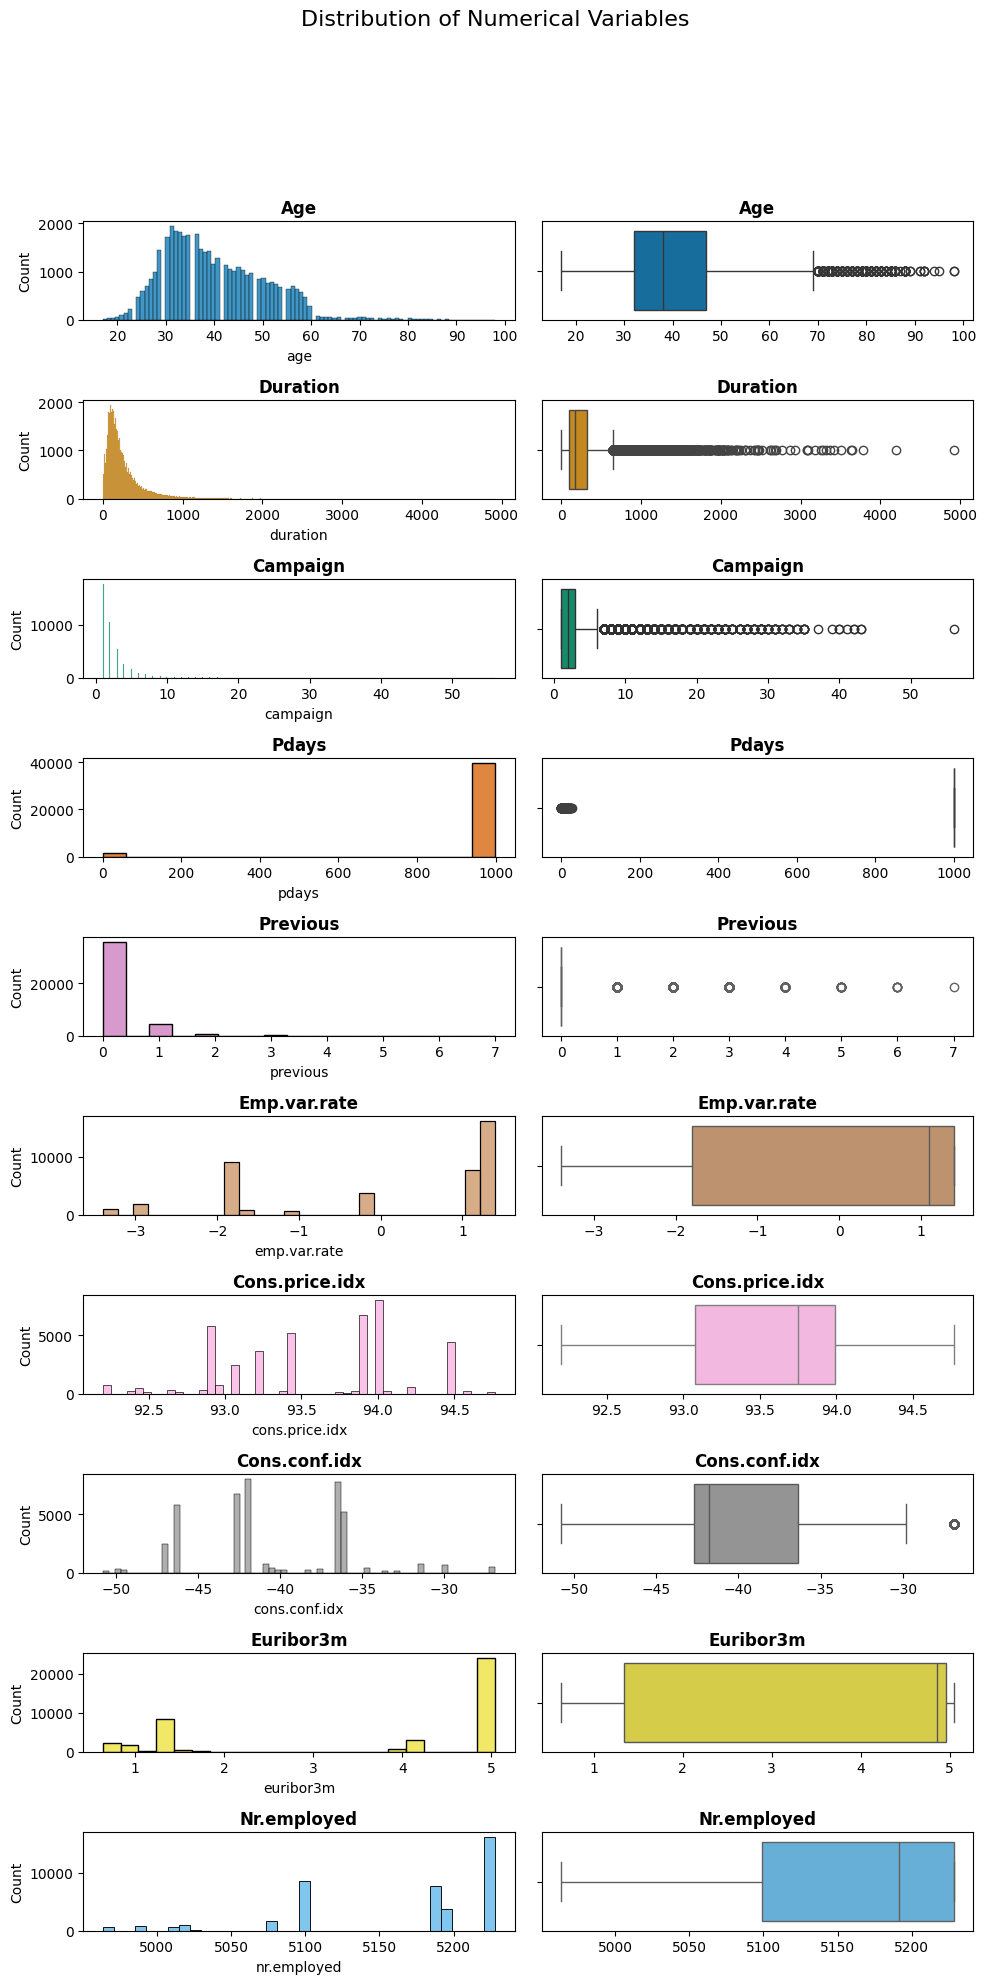

In [16]:
# Obtaining numerical variables graphs
plot_numerical_variables(bank_numerical, hue='y')


**OBSERVATIONS:**

**`age`** (Age of costumers):

- Most clients are between 20 and 60 years old, with a slight skew towards working-age individuals (30-50).
- A small number of outliers, particularly those over 70, should be retained due to their potential significance.

**`duration`**  (Duration of previous contact in seconds):

- Most contact durations are short, concentrated at lower values.
- Significant outliers at higher durations suggest longer contacts may correlate with higher campaign success, making this variable relevant.

**`campaign`**  (Number of contacts made during this campaign to the customer):

- The majority of clients were contacted only a few times (one or two) during the current campaign.
- A few outliers indicate multiple contacts (over 10 times) for some clients, which is less frequent.

**`pdays`** (Number of days that elapsed since the last campaign until the customer was contacted):

- Most clients have a value of 999, indicating they were not contacted in previous campaigns.
- This value should be treated as a distinct category or replaced with NaN to signify no prior contact.

**`previous`** (Number of contacts made during the previous campaign to the customer):

- Most customers have not been contacted before (value 0), while some have had multiple past contacts, which may influence the success rate.

**`Emp.var.rate`**:

- The employment variation rate is distributed across a few specific values.
- Most observations are concentrated at higher values (above 0), with minimal outliers.

**`Cons.price.idx`**: 

- The consumer price index is concentrated around a few specific values, indicating limited variation over time.
- No significant outliers are present.

**`Cons.conf.idx`**:

- The consumer confidence index spans a wide range, but most values cluster between -50 and -30.
- A few minor outliers can be observed.


**`Euribor3m:`**: 

- The 3-month Euribor rate is concentrated around specific values, with most clients having a rate near 5%.
- This reflects economic conditions during a particular period.

**`nr.employed`**:

- The number of employees is concentrated around specific values, with few outliers.
- Most data points fall within a narrow range, suggesting employment stability over time.


**OUTLIERS:** Variables like `duration`, `campaign`, `pdays`, and `previous` show significant outliers, suggesting a need for specific treatment if these extreme values negatively impact modeling.

**ECONOMIC STABILITY**: Variables such as `emp.var.rate`, `cons.price.idx`, `euribor3m`, and `nr.employed` reflect economic stability over certain periods, showing limited variation.

**ELIMINATING IRRELEVANT INFORMATION**

Variables directly related to customer behavior, previous engagement, and broader economic sentiment were retained, as these factors are more likely to influence an individual's decision on long-term deposits.

**Retain:** `age`, `campaign`, `pdays`, `previous`, `emp.var.rate`, `cons.conf.idx`, `euribor3m` and `nr.employed`

**Remove:** `duration`, `previous` and `cons.price.idx`

<br>

**NEW DATASET** (Following the removal of irrelevant data)

In [17]:
# Define the list of columns to remove (both categorical and numerical)
columns_to_remove = ['month', 'day_of_week', 'duration', 'previous', 'cons.price.idx']

# Drop the specified columns from the DataFrame and store the result in a new DataFrame `bank_refined`
bank_refined = bank.drop(columns=columns_to_remove)

# Display the structure of the updated DataFrame to verify the changes
print("Updated DataFrame structure after removing columns:")
print(bank_refined.info())

Updated DataFrame structure after removing columns:
<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            41176 non-null  int64  
 1   job            40846 non-null  object 
 2   marital        41096 non-null  object 
 3   education      39446 non-null  object 
 4   default        32580 non-null  object 
 5   housing        40186 non-null  object 
 6   loan           40186 non-null  object 
 7   contact        41176 non-null  object 
 8   campaign       41176 non-null  int64  
 9   pdays          41176 non-null  int64  
 10  poutcome       5625 non-null   object 
 11  emp.var.rate   41176 non-null  float64
 12  cons.conf.idx  41176 non-null  float64
 13  euribor3m      41176 non-null  float64
 14  nr.employed    41176 non-null  float64
 15  y              41176 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage

In [18]:
# Current dataset
bank_refined.head()

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,1,999,NaN,1.1,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,1,999,NaN,1.1,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,1,999,NaN,1.1,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,1,999,NaN,1.1,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,1,999,NaN,1.1,-36.4,4.857,5191.0,no


<br>

## **STEP 4: MULTIVARIATE VARIABLE ANALYSIS**

- 4.1. Encoding Categorical Values and saving JSON files.
- 4.2. Categorical - Categorical Analysis.
- 4.3. Numerical - Numerical Analysis.
- 4.4. Categorical-Numerical Correlation Matrix

Multivariate analysis also allows combining the class with several predictors at the same time to enrich the analysis.

<br>

**4.1. ENCODING CATEGORICAL VALUES AND SAVING JSON FILES**

In [ ]:
# Create a copy of the original DataFrame to apply the encoding replacements
bank_n = bank_refined.copy()

In [20]:
# Loop through each column to create and save the encoder as JSON
bank_categorical = bank_refined.select_dtypes(include='object').columns
os.makedirs('../data/interim/enc', exist_ok=True)

for col in bank_categorical:
    # Get unique values ​​and create the encoding dictionary
    unique_values = list(bank_refined[col].unique())
    encoder_dict = dict(zip(unique_values, range(len(unique_values))))
    
    # Save the encoding dictionary as a JSON file
    with open(f'../data/interim/enc/{col}_n.json', 'w') as f:
        json.dump(encoder_dict, f)

In [21]:
for col in bank_categorical:
    with open(f'../data/interim/enc/{col}_n.json', 'r') as f:
        encoder_dict = json.load(f)
    bank_n[col] = bank_n[col].map(encoder_dict)

In [22]:
bank_n.head()

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.0,0.0,0.0,0.0,0.0,0.0,0,1,999,NaN,1.1,-36.4,4.857,5191.0,0
1,57,1.0,0.0,1.0,NaN,0.0,0.0,0,1,999,NaN,1.1,-36.4,4.857,5191.0,0
2,37,1.0,0.0,1.0,0.0,1.0,0.0,0,1,999,NaN,1.1,-36.4,4.857,5191.0,0
3,40,2.0,0.0,2.0,0.0,0.0,0.0,0,1,999,NaN,1.1,-36.4,4.857,5191.0,0
4,56,1.0,0.0,1.0,0.0,0.0,1.0,0,1,999,NaN,1.1,-36.4,4.857,5191.0,0


**4.2. CATEGORICAL-CATEGORICAL ANALYSIS**

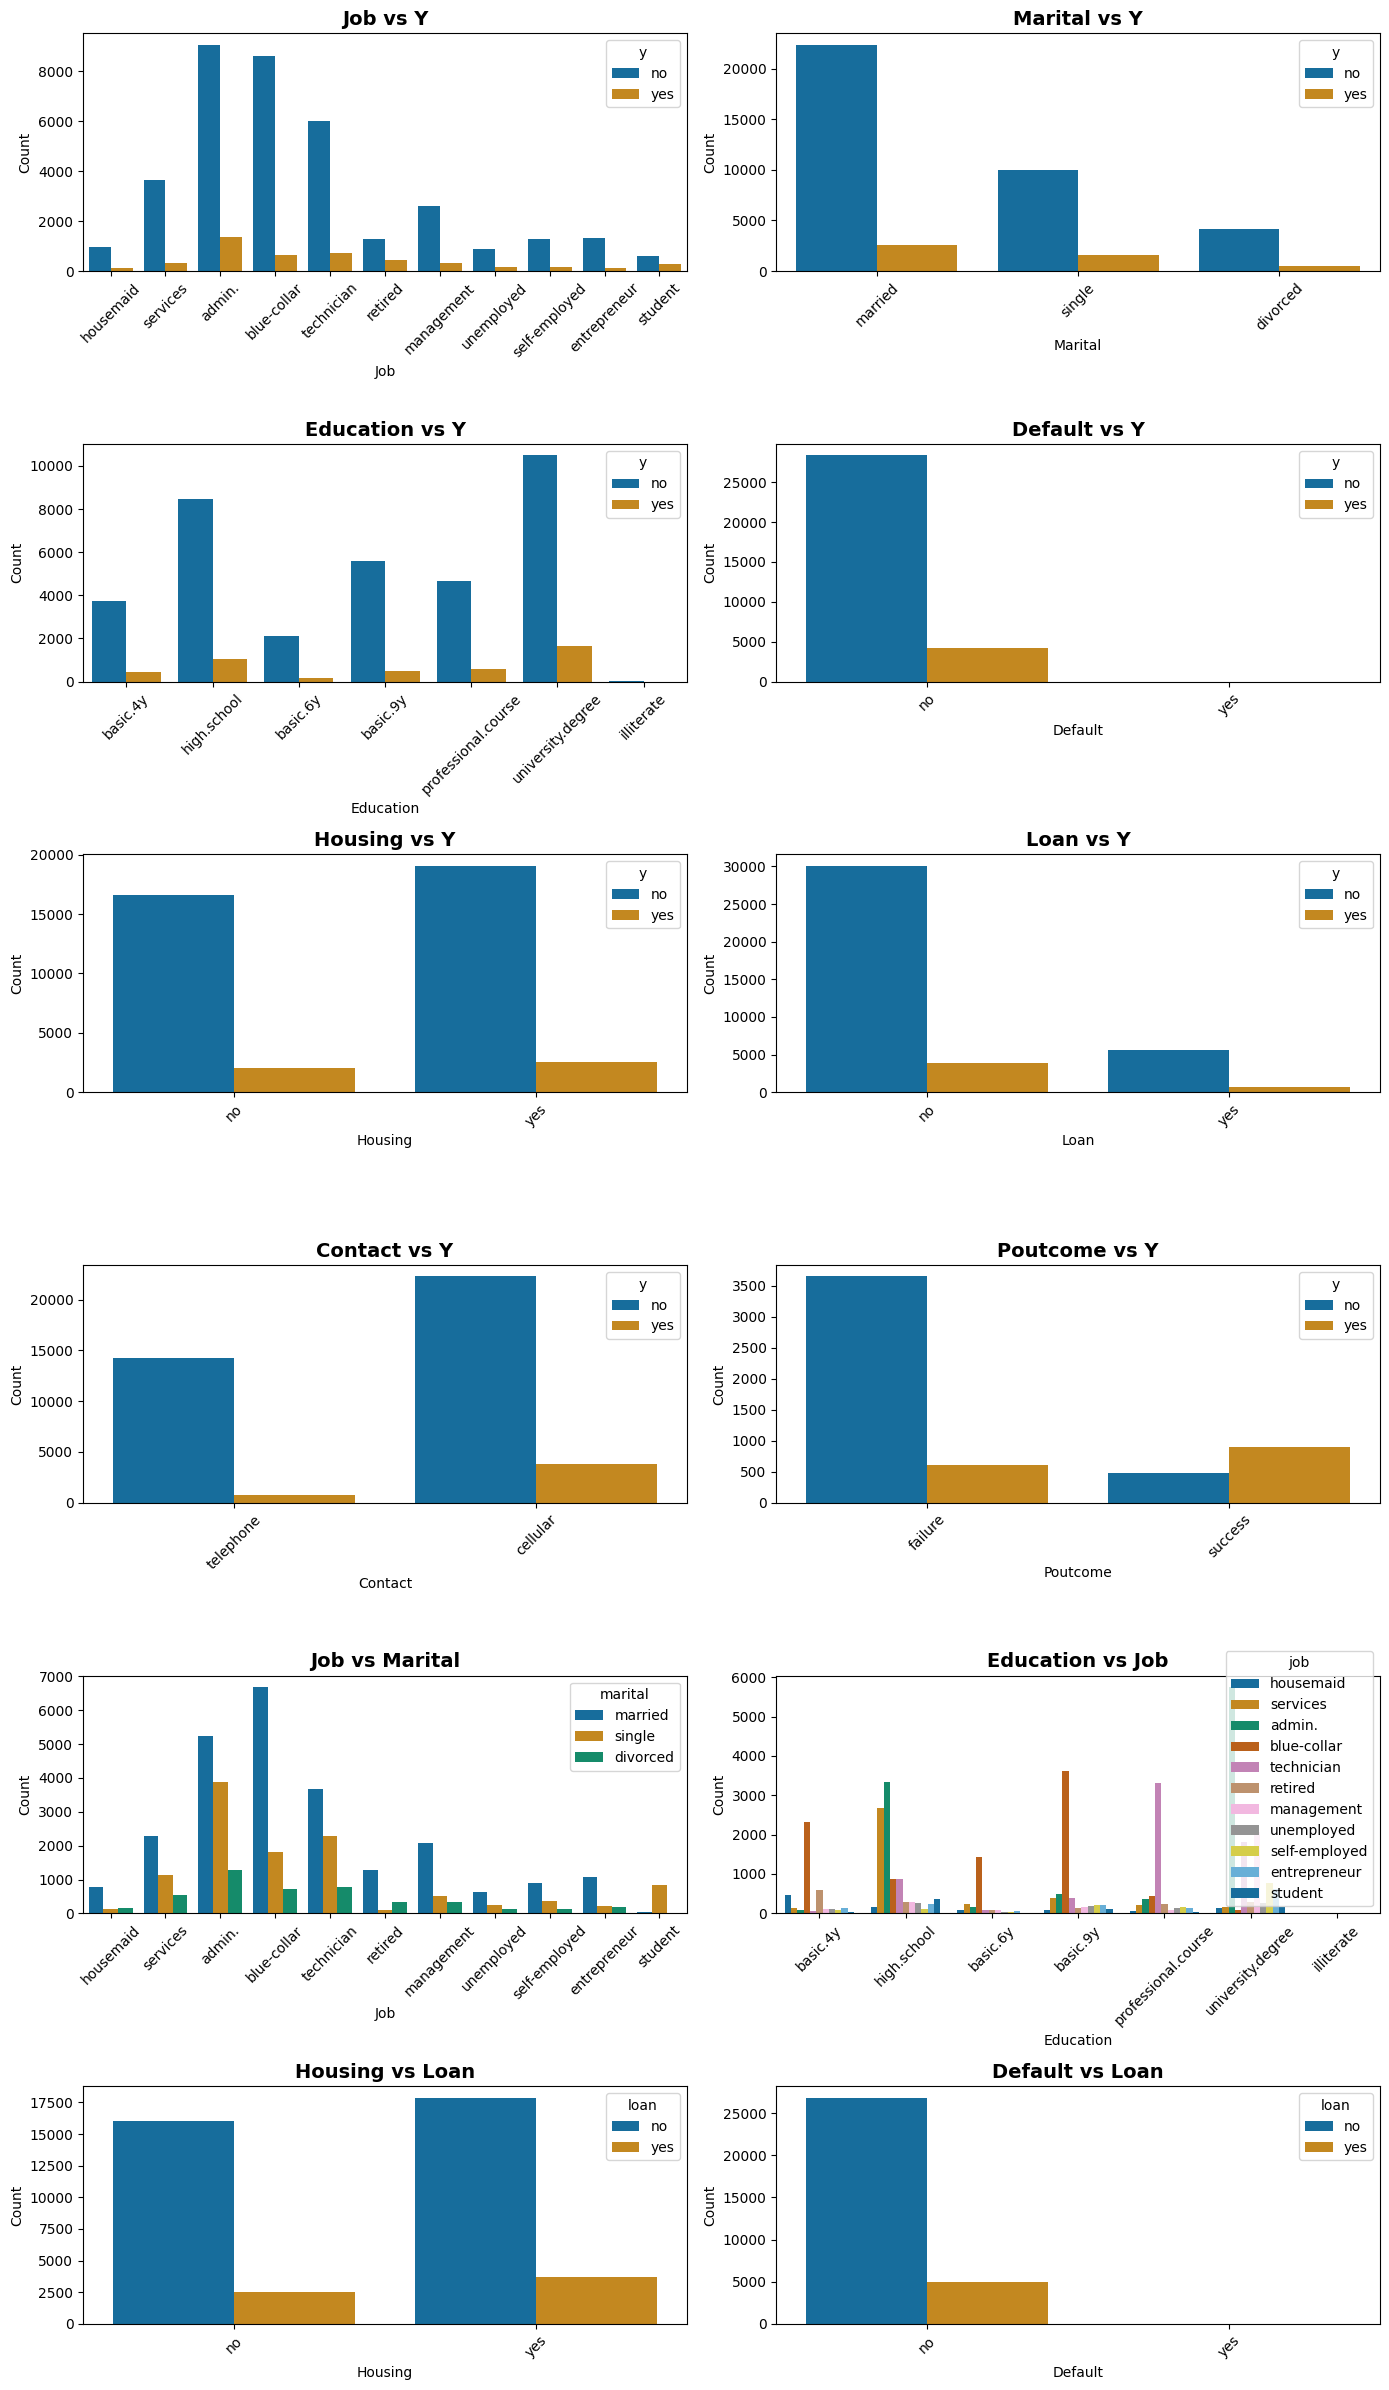

In [23]:
# Defines categorical variables for cross-analysis
categorical_pairs = [
    ('job', 'y'),
    ('marital', 'y'),
    ('education', 'y'),
    ('default', 'y'),
    ('housing', 'y'),
    ('loan', 'y'),
    ('contact', 'y'),
    ('poutcome', 'y'),
    # Additional pairs to understand specific combinations
    ('job', 'marital'),
    ('education', 'job'),
    ('housing', 'loan'),
    ('default', 'loan')
]

# Calculate the number of rows required for 2 column layout
num_rows = (len(categorical_pairs) + 1) // 2

# Create figure and axes with 2 columns layout
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 4))
plt.subplots_adjust(hspace=0.5)

# Flatten axes for easy iteration
axes = axes.flatten()


# Generate stacked bar plots for each pair in `categorical_pairs`
for i, (var1, var2) in enumerate(categorical_pairs):
    # Stacked bar plot for cross-lagged analysis
    sns.countplot(data=bank_refined, x=var1, hue=var2, ax=axes[i], palette="colorblind")
    axes[i].set_title(f'{var1.capitalize()} vs {var2.capitalize()}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(var1.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused axes if there's an odd number of pairs
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Final layout adjustment
plt.tight_layout()
plt.show()

**OBSERVATIONS:**

- `Job` vs `Marital`: Different marital statuses are associated with specific occupations. For instance, “married” individuals are more prevalent across various professions, while “single” is more common among “students” and those in “services.” These insights can inform demographic targeting for campaigns.

- `Education` vs `Job`: Certain professions are concentrated at particular education levels. For example, “admin.” and “blue-collar” roles are primarily associated with high school education, whereas “management” and “technician” roles have a broader distribution across education levels.

- `Housing` vs `Loan`: Most customers have only one type of financial commitment. Those without a home loan typically also lack a personal loan. This profile can help identify customers with a higher potential to invest in new products.

- `Default` vs `Loan`: Most customers without loan defaults also do not have personal loans, suggesting a potential aversion to debt. Customers with existing debt or defaults are less likely to take on new financial products.

<br>

<br>

**4.3. NUMERICAL-NUMERICAL ANALYSIS**

In this bank marketing dataset, our variable of interest for bivariate analysis is `y`, which indicates whether a customer subscribed to the long-term deposit product. As a binary outcome variable, `y` represents the success of the bank’s marketing efforts. Analyzing how `y` varies in relation to other continuous numerical variables can help us identify potential factors that influence a customer's likelihood to subscribe. This analysis allows us to uncover patterns and correlations that could inform more targeted and effective marketing strategies.

When the two variables being compared have numerical data, the analysis is said to be numerical-numerical. Scatterplots and correlation analysis are used to compare two numerical columns. In this analysis I decided to create a correlation matrix to observe the relationship between numerical variables.

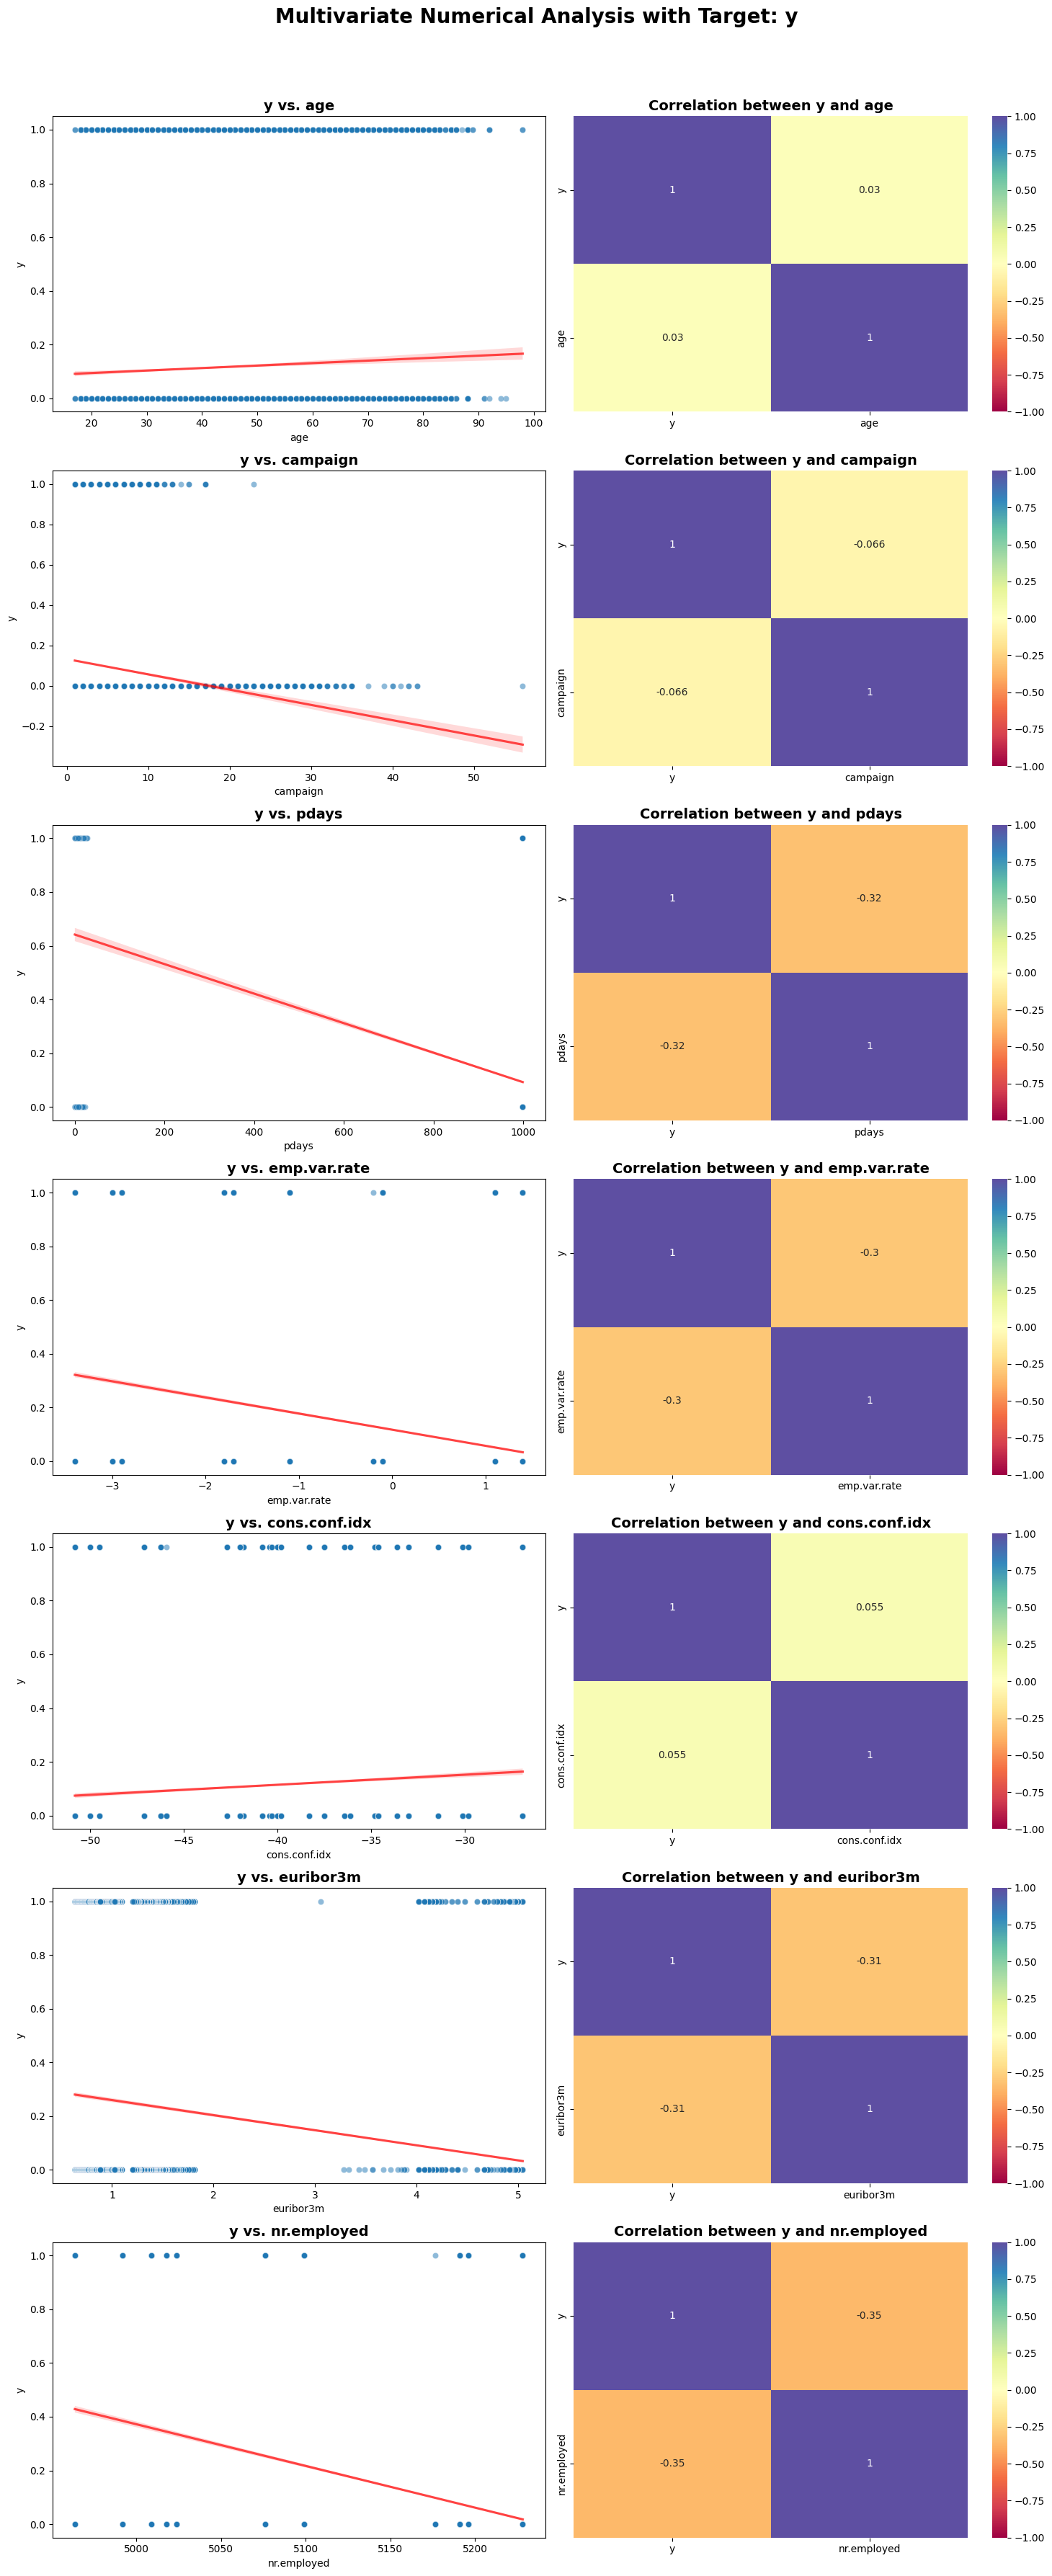

In [24]:
def multivariate_numeric_analysis(bank, target_variable, numerical_columns):
    """
    Generates scatter plots and correlation matrices between the variable of interest and other numerical variables.

    Parameters:
    - bank: DataFrame containing the data.
    - target_variable: String representing the name of the variable of interest (must be in numerical format).
    - numerical_columns: List of strings with the names of the numerical columns for analysis.
    """
    # Subplots configuration
    num_vars = len(numerical_columns)
    fig, axes = plt.subplots(num_vars, 2, figsize=(15, num_vars * 5))
    fig.suptitle(f'Multivariate Numerical Analysis with Target: {target_variable}', fontsize=20, fontweight= 'bold', y=1.02)
    print()
    
    # Loop through numeric variables
    for i, col in enumerate(numerical_columns):
        # Scatterplot with regression line
        sns.scatterplot(ax=axes[i, 0], data=bank_n, x=col, y=target_variable, alpha=0.5)
        sns.regplot(ax=axes[i, 0], data=bank_n, x=col, y=target_variable, scatter=False, color='red', line_kws={"alpha":0.7})
        axes[i, 0].set_title(f'{target_variable} vs. {col}', fontsize=14, fontweight='bold')
        
        # Correlation matrix between the target variable and the numerical variable
        corr_data = bank_n[[target_variable, col]].corr()
        sns.heatmap(ax=axes[i, 1], data=corr_data, annot=True, cmap='Spectral', cbar=True, vmin=-1, vmax=1)
        axes[i, 1].set_title(f'Correlation between {target_variable} and {col}', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Usage example with the DataFrame bank_refined, the variable of interest 'y_n' and a list of numeric variables
numerical_columns = ['age', 'campaign', 'pdays', 'emp.var.rate', 'cons.conf.idx', 'euribor3m', 'nr.employed']
target_variable = 'y'
multivariate_numeric_analysis(bank_n, target_variable, numerical_columns)

**OBSERVATIONS:**

- `Age` vs `y_n`:
The relationship between age and the target variable (y_n) is virtually nonexistent, with a correlation very close to zero (0.03). This indicates that the customer's age does not have a significant impact on the decision to subscribe to the long-term product.

- `campaign` vs `y_n`:
The correlation between the number of contacts in the current campaign (campaign) and y_n is negative and weak (-0.066). This suggests that the more times the customer was contacted in the current campaign, the slightly lower the probability of subscription. However, this relationship is very weak and, alone, is not a good predictor.

- `pdays` vs `y_n`:
The variable pdays, representing the number of days since the customer was last contacted in a previous campaign, has a more expressive negative correlation with y_n (-0.32). This indicates that customers who were contacted a long time ago in previous campaigns tend to have a slightly lower probability of subscription. This correlation may indicate that recently contacted customers are more likely to subscribe, but the relationship is still not very strong.

- `Emp.var.rate` vs `y_n`:
The employment variation rate (emp.var.rate) has a moderate negative correlation with y_n (-0.3). This result may indicate that, in periods of low employment variation, the probability of subscribing to the product tends to be slightly higher. However, since the correlation is still moderate, this suggests that this variable, although relevant, is not decisive on its own.

- `Cons.conf.idx` vs `y_n`:
The consumer confidence index (cons.conf.idx) has a very weak and positive correlation with y_n (0.055). This indicates that consumer confidence has little or no direct impact on the customer's decision to subscribe to the product. The variable, in this case, can be considered of low relevance for predicting subscription.

- `Euribor3m` vs `y_n`:
The 3-month Euribor interest rate (euribor3m) shows a moderate negative correlation with y_n (-0.31), similar to the employment variation variable. This indicates that higher interest rates are associated with a slightly lower probability of subscribing to the product. Customers may be more reluctant to invest when interest rates are high, but, as with the other variables, the correlation is moderate.

- `Nr.employed` vs `y_n`:
The number of employees (nr.employed) presents a moderate negative correlation coefficient with y_n (-0.35). This suggests that, as the number of employees increases, the probability of subscribing to the long-term product (y_n = 1) tends to decrease. This may reflect greater economic security where, with more employment, customers may feel less inclined to seek alternative investment or savings options.

<br>

<br>

**4.4 CATEGORICAL-NUMERICAL CORRELATION MATRIX**

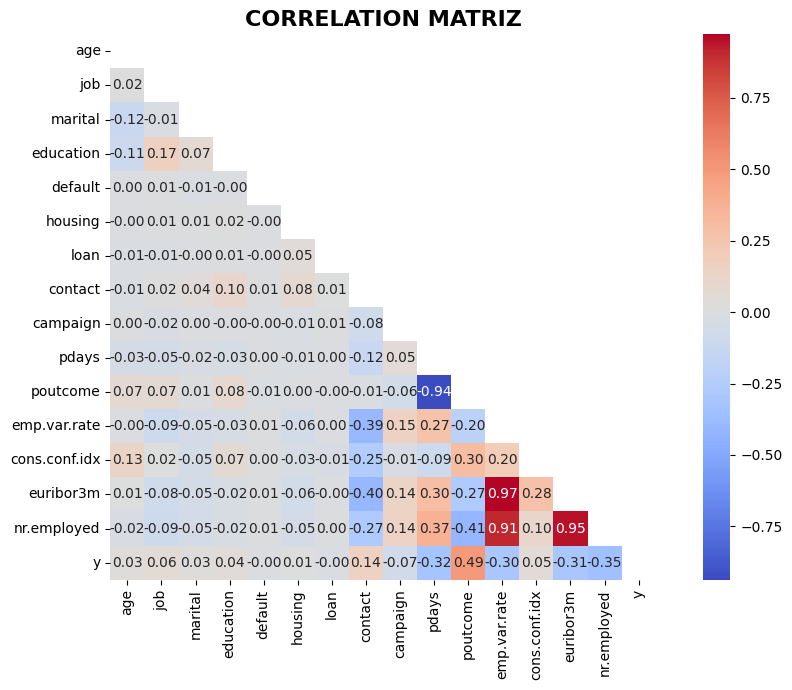

In [25]:
corr_matrix = bank_n.corr()

plt.figure(figsize=(10, 7))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=np.triu(corr_matrix), square=True)

plt.title("CORRELATION MATRIZ", fontsize=16, fontweight='bold')
print()
plt.tight_layout()
plt.show()

**OBSERVATIONS:**

There are strong correlations between `emp.var.rate`, `cons.conf.idx`, `euribor3m`, and `nr.employed`, indicating that these variables are closely linked to broader economic conditions.

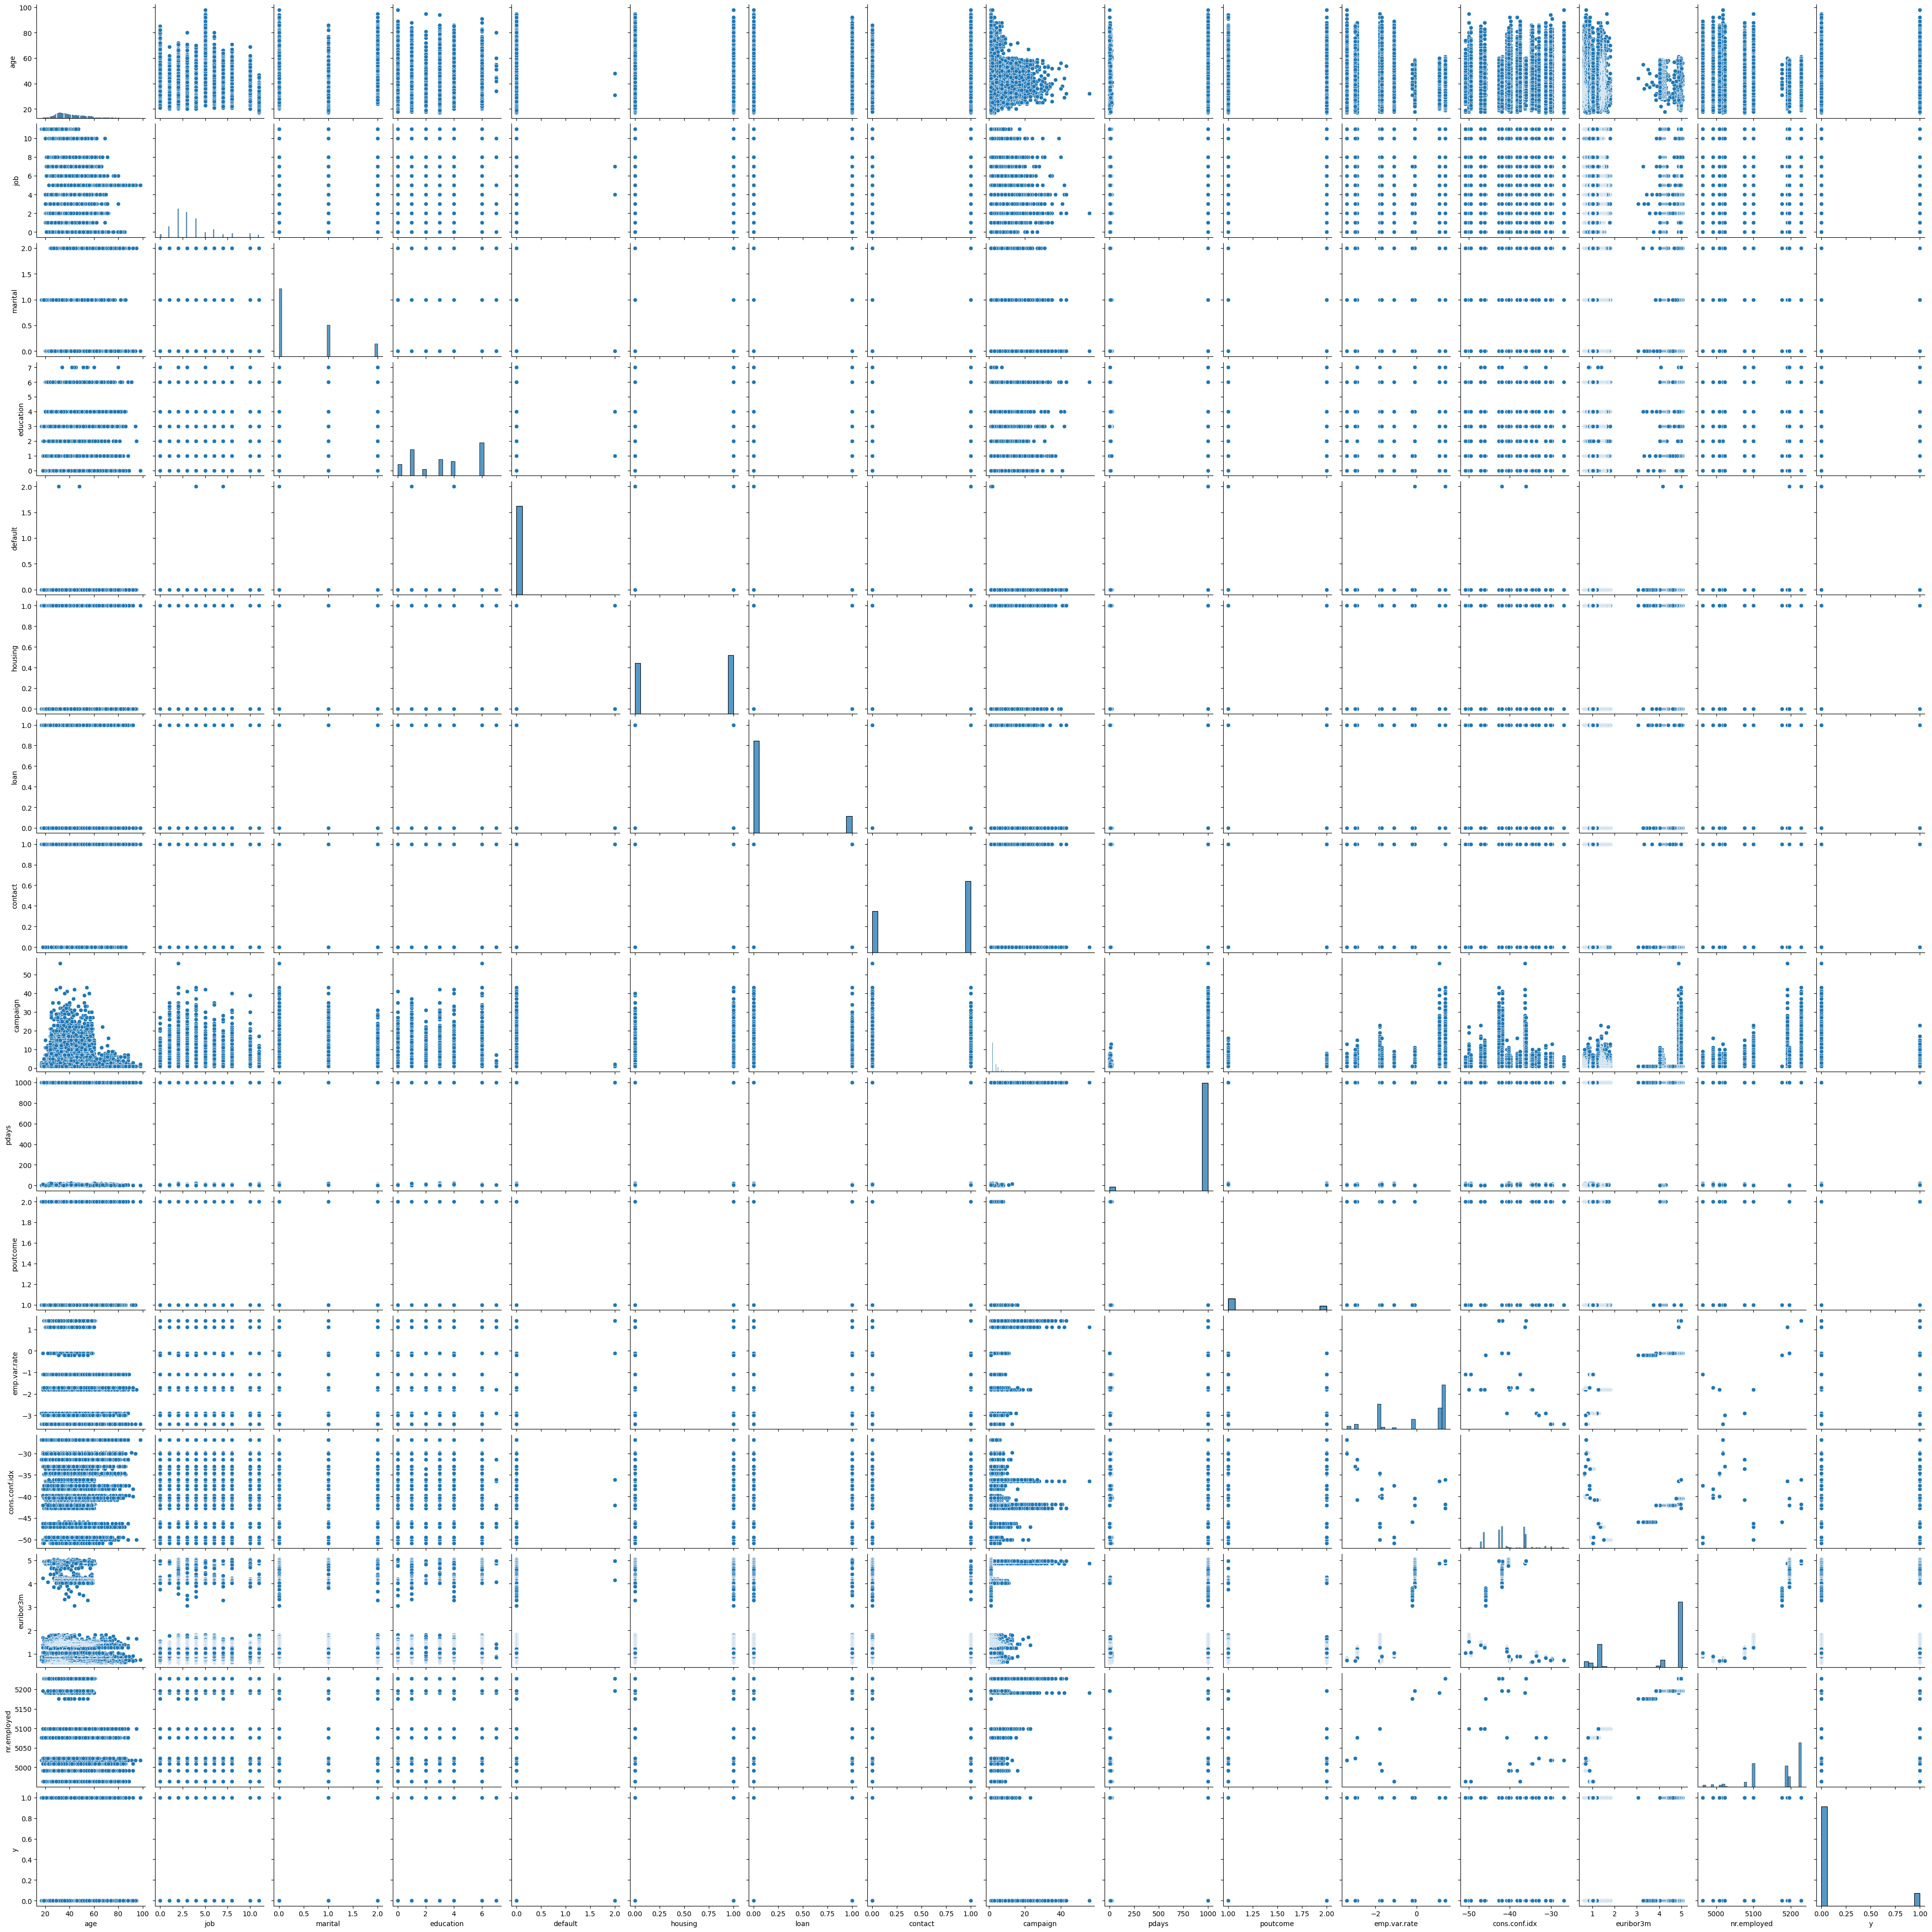

In [26]:
# Graphics
sns.pairplot(data=bank_n)
plt.show()

<br>

# **STEP 5: FEATURE ENGINEERING**

- 5.1. Outlier analysis
- 5.2. Missing Values
- 5.3. Split TRAIN/TEST of both Dataframes
- 5.3. Normalization
- 5.4. min-MAX Scaling

<br>

**5.1. OUTLIER ANALYSIS**

In [27]:
# Generates descriptive statistics for the DataFrame `bank_n` and rounds them to 2 decimal places
bank_stats = bank_n.describe().round(2)
bank_stats

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00,40846.00,41096.00,39446.0,32580.00,40186.00,40186.00,41176.00,41176.00,41176.00,5625.00,41176.00,41176.00,41176.00,41176.00,41176.00
mean,40.02,3.63,0.51,3.2,0.00,0.54,0.16,0.63,2.57,962.46,1.24,0.08,-40.50,3.62,5167.03,0.11
std,10.42,2.42,0.69,2.2,0.02,0.50,0.36,0.48,2.77,186.94,0.43,1.57,4.63,1.73,72.25,0.32
min,17.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.00,0.00,1.00,-3.40,-50.80,0.63,4963.60,0.00
25%,32.00,2.00,0.00,1.0,0.00,0.00,0.00,0.00,1.00,999.00,1.00,-1.80,-42.70,1.34,5099.10,0.00
50%,38.00,3.00,0.00,3.0,0.00,1.00,0.00,1.00,2.00,999.00,1.00,1.10,-41.80,4.86,5191.00,0.00
75%,47.00,4.00,1.00,6.0,0.00,1.00,0.00,1.00,3.00,999.00,1.00,1.40,-36.40,4.96,5228.10,0.00
max,98.00,11.00,2.00,7.0,2.00,1.00,1.00,1.00,56.00,999.00,2.00,1.40,-26.90,5.04,5228.10,1.00


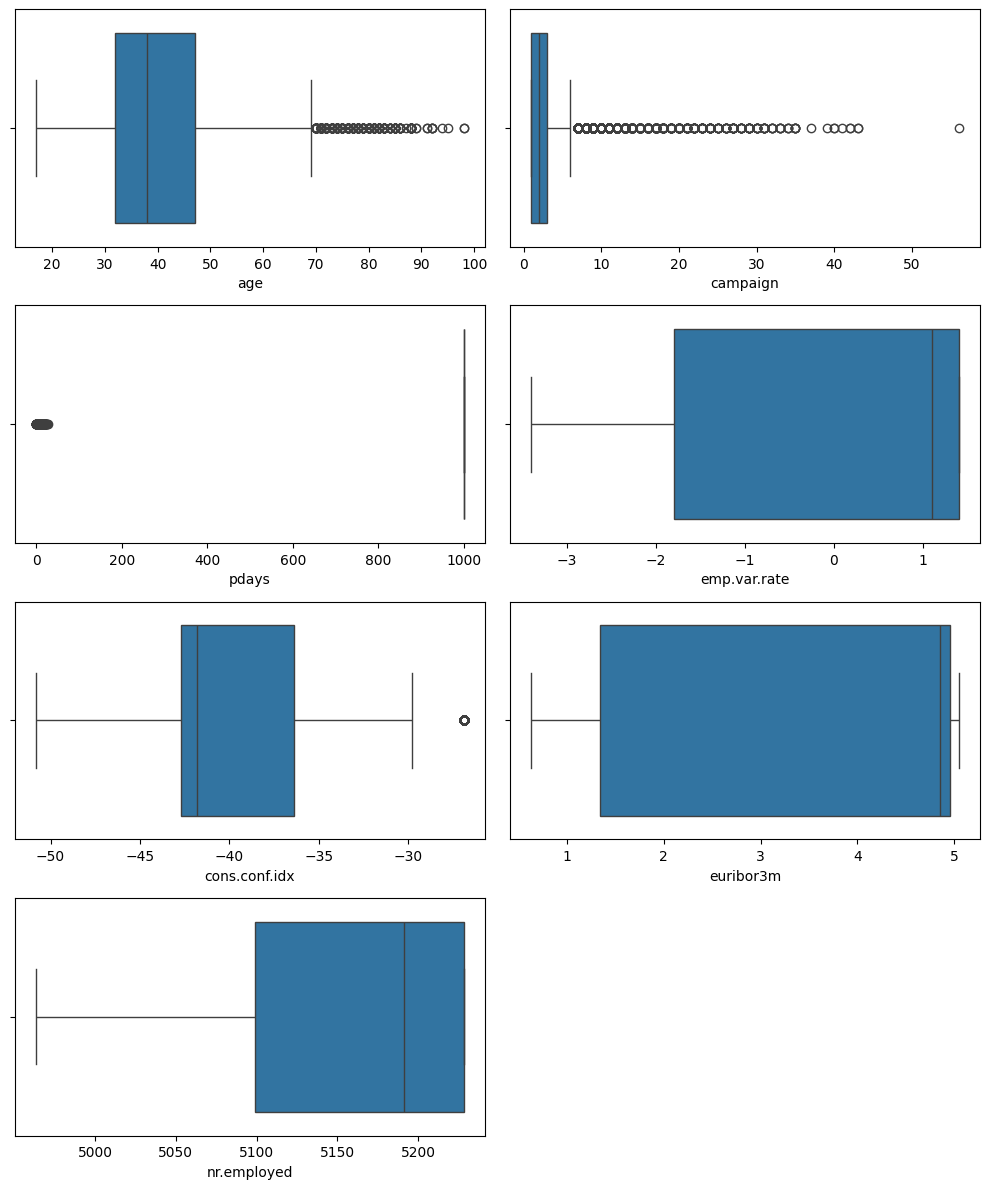

In [28]:
fig, ax = plt.subplots(4, 2, figsize=(10, 12))

sns.boxplot(ax = ax[0,0], data = bank_n, x='age')
sns.boxplot(ax = ax[0,1], data = bank_n, x='campaign')

sns.boxplot(ax = ax[1,0], data = bank_n, x='pdays')
sns.boxplot(ax = ax[1,1], data = bank_n, x='emp.var.rate')

sns.boxplot(ax = ax[2,0], data = bank_n, x='cons.conf.idx')
sns.boxplot(ax = ax[2,1], data = bank_n, x='euribor3m')

sns.boxplot(ax = ax[3,0], data = bank_n, x='nr.employed')

# Remove the empty subplot
fig.delaxes(ax[3, 1])

plt.tight_layout()
plt.show()

The following variables require outlier treatment to improve analysis accuracy:

- `Age`: Outlier treatment for age is crucial to accurately represent the typical age range of customers, preventing extreme values from skewing the profile analysis.
- `Campaign`: The campaign variable (number of contacts) has significant outliers, potentially indicating excessive contact with certain customers. Treating these outliers is essential to assess the impact of contact frequency without the distortion caused by extreme cases.
- `pdays`: The number of days since the last contact (pdays) has extreme values of 999, indicating customers who haven't been contacted previously. These extreme values can be treated as a separate category or filled with null values to accurately represent new contacts.


A new dataframe (`bank_without_outliers`) will be created using the determined outlier limits. This cleaned dataset will be used to train the model and compare its performance to the original dataset to identify the optimal approach.

In [29]:
bank_with_outliers = bank_n.copy()
bank_without_outliers = bank_n.copy()

In [30]:

def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr * 1.5)
    lower_lim = q1 - (iqr * 1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    # Asegurarse de que el directorio "./enc/" exista
    directory = './enc/'
    os.makedirs(directory, exist_ok=True)

    # Guardar los límites como un archivo JSON
    filename = f'{directory}outliers_lims_{feature_name}.json'
    with open(filename, 'w') as file:
        json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, file)

    return x

# Aplicación de la función
bank_without_outliers['age'] = remove_outliers(bank_without_outliers['age'], 'age')
bank_without_outliers['campaign'] = remove_outliers(bank_without_outliers['campaign'], 'campaign')
bank_without_outliers['pdays'] = remove_outliers(bank_without_outliers['pdays'], 'pdays')


In [31]:
bank_with_outliers.head()

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.0,0.0,0.0,0.0,0.0,0.0,0,1,999,NaN,1.1,-36.4,4.857,5191.0,0
1,57,1.0,0.0,1.0,NaN,0.0,0.0,0,1,999,NaN,1.1,-36.4,4.857,5191.0,0
2,37,1.0,0.0,1.0,0.0,1.0,0.0,0,1,999,NaN,1.1,-36.4,4.857,5191.0,0
3,40,2.0,0.0,2.0,0.0,0.0,0.0,0,1,999,NaN,1.1,-36.4,4.857,5191.0,0
4,56,1.0,0.0,1.0,0.0,0.0,1.0,0,1,999,NaN,1.1,-36.4,4.857,5191.0,0


In [32]:
bank_without_outliers.head()

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,999.0,NaN,1.1,-36.4,4.857,5191.0,0
1,57.0,1.0,0.0,1.0,NaN,0.0,0.0,0,1.0,999.0,NaN,1.1,-36.4,4.857,5191.0,0
2,37.0,1.0,0.0,1.0,0.0,1.0,0.0,0,1.0,999.0,NaN,1.1,-36.4,4.857,5191.0,0
3,40.0,2.0,0.0,2.0,0.0,0.0,0.0,0,1.0,999.0,NaN,1.1,-36.4,4.857,5191.0,0
4,56.0,1.0,0.0,1.0,0.0,0.0,1.0,0,1.0,999.0,NaN,1.1,-36.4,4.857,5191.0,0


In [33]:
# Removing column pdays from dataset
bank_with_outliers.drop(columns=['pdays'], inplace=True)
bank_without_outliers.drop(columns=['pdays'], inplace=True)

In [34]:
bank_with_outliers.head()

,age,job,marital,education,default,housing,loan,contact,campaign,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NaN,1.1,-36.4,4.857,5191.0,0
1,57,1.0,0.0,1.0,NaN,0.0,0.0,0,1,NaN,1.1,-36.4,4.857,5191.0,0
2,37,1.0,0.0,1.0,0.0,1.0,0.0,0,1,NaN,1.1,-36.4,4.857,5191.0,0
3,40,2.0,0.0,2.0,0.0,0.0,0.0,0,1,NaN,1.1,-36.4,4.857,5191.0,0
4,56,1.0,0.0,1.0,0.0,0.0,1.0,0,1,NaN,1.1,-36.4,4.857,5191.0,0


<br>

**5.2. MISSING VALUES**

In [35]:
# Function to fill NaN values based on data type
def fill_na_values(bank):
    """
    Fills NaN values in a DataFrame based on the data type of each column.
    
    Parameters:
    - bank: DataFrame to be filled with non-null values.

    Returns:
    - DataFrame with NaN values filled.
    """
    # Separate columns by type
    categorical_columns = bank.select_dtypes(include=['object']).columns
    numerical_columns = bank.select_dtypes(include=['float64', 'int64']).columns

    # Fill categorical NaNs with the mode
    for col in categorical_columns:
        bank[col].fillna(bank[col].mode()[0], inplace=True)

    # Fill numerical NaNs with the median
    for col in numerical_columns:
        bank[col].fillna(bank[col].median(), inplace=True)

    return bank

# Apply the function to both dataframes
bank_without_outliers = fill_na_values(bank_without_outliers)
bank_with_outliers = fill_na_values(bank_with_outliers)

# Display the total of NaN values in each DataFrame to verify if they are filled
print("NaN values in bank_with_outliers:")
print(bank_with_outliers.isnull().sum().sort_values(ascending=False))

print("\nNaN values in bank_without_outliers:")
print(bank_without_outliers.isnull().sum().sort_values(ascending=False))

NaN values in bank_with_outliers:
age              0
job              0
marital          0
education        0
default          0
housing          0
loan             0
contact          0
campaign         0
poutcome         0
emp.var.rate     0
cons.conf.idx    0
euribor3m        0
nr.employed      0
y                0
dtype: int64

NaN values in bank_without_outliers:
age              0
job              0
marital          0
education        0
default          0
housing          0
loan             0
contact          0
campaign         0
poutcome         0
emp.var.rate     0
cons.conf.idx    0
euribor3m        0
nr.employed      0
y                0
dtype: int64


<br>

**5.3. SPLIT TRAIN/TEST OF BOTH DATAFRAME**

In [36]:
# Function to split data into training and testing sets
def split(target, bank, test_size=0.2, random_state=123):
    """
    Splits a DataFrame into training and testing sets.

    Parameters:
    - target: str, the name of the target column to be predicted
    - bank: DataFrame, the complete DataFrame to split
    - test_size: float, proportion of the data to allocate to the test set (default is 0.2)
    - random_state: int, sets the seed for reproducibility (default is 123)

    Returns:
    - X_train, X_test: DataFrames containing the training and testing features
    - y_train, y_test: Series containing the training and testing target values
    """
    
    # Separate the features (X) from the target (y)
    X = bank.drop(columns=target)  # Drop the target column from features
    y = bank[target]               # Define the target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    return X_train, X_test, y_train, y_test

In [37]:
# Split original dataframe 
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('y', bank_with_outliers)
X_train_without_outliers, X_test_without_outliers, _, _ = split('y', bank_without_outliers)

X_train_with_outliers.to_csv('../data/processed/X_train_with_outliers.csv', index=False)
X_test_with_outliers.to_csv('../data/processed/X_test_with_outliers.csv', index=False)
X_train_without_outliers.to_csv('../data/processed/X_train_without_outliers.csv', index=False)
X_test_without_outliers.to_csv('../data/processed/X_test_without_outliers.csv', index=False)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

In [38]:
# View train and test data for verification (optional)
X_train_with_outliers.head()

,age,job,marital,education,default,housing,loan,contact,campaign,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed
12787,38,2.0,0.0,1.0,0.0,0.0,0.0,1,1,1.0,1.4,-42.7,4.962,5228.1
24409,39,3.0,0.0,4.0,0.0,0.0,0.0,1,1,1.0,-0.1,-42.0,4.191,5195.8
39632,24,11.0,1.0,1.0,0.0,1.0,0.0,1,2,1.0,-1.8,-40.0,0.682,5008.7
41176,38,0.0,2.0,1.0,0.0,1.0,1.0,1,1,1.0,-1.1,-50.8,1.031,4963.6
5988,32,4.0,1.0,1.0,0.0,1.0,0.0,0,1,1.0,1.1,-36.4,4.857,5191.0


In [39]:
# Displays the first five rows of the `X_train_without_outliers` DataFrame for a quick preview of the data.
X_train_without_outliers.head()

,age,job,marital,education,default,housing,loan,contact,campaign,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed
12787,38.0,2.0,0.0,1.0,0.0,0.0,0.0,1,1.0,1.0,1.4,-42.7,4.962,5228.1
24409,39.0,3.0,0.0,4.0,0.0,0.0,0.0,1,1.0,1.0,-0.1,-42.0,4.191,5195.8
39632,24.0,11.0,1.0,1.0,0.0,1.0,0.0,1,2.0,1.0,-1.8,-40.0,0.682,5008.7
41176,38.0,0.0,2.0,1.0,0.0,1.0,1.0,1,1.0,1.0,-1.1,-50.8,1.031,4963.6
5988,32.0,4.0,1.0,1.0,0.0,1.0,0.0,0,1.0,1.0,1.1,-36.4,4.857,5191.0


In [40]:
# Displays the first five rows of the `X_train_with_outliers` DataFrame for a quick preview of the data.
y_train.head()

12787    0
24409    0
39632    0
41176    0
5988     0
Name: y, dtype: int64

<br>

**5.3. NORMALIZATION**

In [41]:
def normalize_and_save(X_train, X_test, filename):
    """
    Normalizes the data using StandardScaler and saves the scaler for future use.

    Parameters:
    - X_train: DataFrame with the training data
    - X_test: DataFrame with the testing data
    - filename: string, the name of the file to save the scaler

    Returns:
    - X_train_norm: DataFrame with the normalized training data
    - X_test_norm: DataFrame with the normalized testing data
    """

    # Initialize and adjusts the scaler
    scaler = StandardScaler()
    scaler.fit(X_train)  # Ajusta o scaler com os dados de treino

    # Apply normalization to training and testing data
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    # Save the scaler for future use
    joblib.dump(scaler, f'../data/processed/{filename}.sav')

    return X_train_norm, X_test_norm

# Application of the function to normalize data with and without outliers
X_train_with_outliers_norm, X_test_with_outliers_norm = normalize_and_save(
    X_train_with_outliers, X_test_with_outliers, 'normalized_with_outliers'
)

X_train_without_outliers_norm, X_test_without_outliers_norm = normalize_and_save(
    X_train_without_outliers, X_test_without_outliers, 'normalized_without_outliers'
)

<br>

**5.4. min-MAX SCALING** 

In [42]:
def minmax_and_save(X_train, X_test, filename):
    """
    Applies Min-Max Scaling to the data and saves the scaler for future use.

    Parameters:
    - X_train: DataFrame with the training data
    - X_test: DataFrame with the testing data
    - filename: string, the name of the file to save the scaler

    Returns:
    - X_train_minmax: DataFrame with the scaled training data
    - X_test_minmax: DataFrame with the scaled testing data
    """

    scaler = MinMaxScaler()
    scaler.fit(X_train)  # Fit the scaler with training data

    # Apply Min-Max Scaling to training and testing data
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index=X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index=X_test.index, columns=X_test.columns)

    # Save the scaler for future use
    joblib.dump(scaler, f'./enc/{filename}.sav')

    return X_train_minmax, X_test_minmax

# Applying the function to scale data with and without outliers
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax_and_save(
    X_train_with_outliers, X_test_with_outliers, 'minmax_with_outliers'
)

X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax_and_save(
    X_train_without_outliers, X_test_without_outliers, 'minmax_without_outliers'
)

<br>

# **STEP 6: FEATURE SELECTION**

- 6.1. Applying the filter to the normalized and minmax scaled data frames
- 6.2. Saving the CSV files

<br>

In [43]:
def kselection_and_save(X_train, X_test, y_train, k, filename):
    """
    Applies feature selection using SelectKBest and saves the model for future use.

    Parameters:
    - X_train: DataFrame with training data
    - X_test: DataFrame with testing data
    - y_train: Series with target training data
    - k: Number of features to select
    - filename: String, the name of the file to save the selection model

    Returns:
    - X_train_sel: DataFrame with selected features from training data
    - X_test_sel: DataFrame with selected features from testing data
    """
    # Creates the feature selection model
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)

    # Select columns based on model
    selected_columns = X_train.columns[selection_model.get_support()]

    # Transforms training and testing data to keep only selected features
    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=selected_columns, index=X_train.index)
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=selected_columns, index=X_test.index)

    # Save the selection model
    joblib.dump(selection_model, f'../data/processed/{filename}.sav')

    return X_train_sel, X_test_sel

# Application of the function to select features with and without outliers
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection_and_save(
    X_train_with_outliers, X_test_with_outliers, y_train, 7, 'selection_model_with_outliers'
)

X_train_without_outliers_sel, X_test_without_outliers_sel = kselection_and_save(
    X_train_without_outliers, X_test_without_outliers, y_train, 7, 'selection_model_without_outliers'
)

**6.1. APPLYING THE FILTER TO THE NORMALIZED AN min-MAX SCALED DATAFRAME**


In [44]:
# Applying the filter to normalized and Min-Max Scaling datasets

# Normalized data
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_without_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_without_outliers_sel.columns]

# Scaled data with Min-Max
X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

**6.2. SAVING THE CSV FILES**

In [45]:
banks_train = {
    'X_train_with_outliers_sel': X_train_with_outliers_sel,
    'X_train_without_outliers_sel': X_train_without_outliers_sel,
    'X_train_with_outliers_norm_sel': X_train_with_outliers_norm_sel,
    'X_train_without_outliers_norm_sel': X_train_without_outliers_norm_sel,
    'X_train_with_outliers_minmax_sel': X_train_with_outliers_minmax_sel,
    'X_train_without_outliers_minmax_sel': X_train_without_outliers_minmax_sel 
}

banks_test = {
    'X_test_with_outliers_sel': X_test_with_outliers_sel,
    'X_test_without_outliers_sel': X_test_without_outliers_sel,
    'X_test_with_outliers_norm_sel': X_test_with_outliers_norm_sel,
    'X_test_without_outliers_norm_sel': X_test_without_outliers_norm_sel,
    'X_test_with_outliers_minmax_sel': X_test_with_outliers_minmax_sel,
    'X_test_without_outliers_minmax_sel': X_test_without_outliers_minmax_sel    
}

for name, bank in banks_train.items():
    bank.to_csv(f"../data/processed/{name}.csv", index=False)

for name, bank in banks_test.items(): 
    bank.to_csv(f'../data/processed/{name}.csv', index=False)

# **STEP 7: MACHINE LEARNING**

- 7.1. Choosing the best Dataset

**7.1. CHOOSING THE BEST DATASET**

- Wich is the best Dataset?

In [46]:
train, test = [], []

for name, bank in banks_train.items():
    train.append(bank)
for name, bank in banks_test.items():
    test.append(bank)

In [47]:
results = []

for index in range(len(train)):
    model = LogisticRegression(solver='liblinear', max_iter=1000)
    train_bank = train[index]
    model.fit(train_bank, y_train)
    y_train_pred = model.predict(train_bank)
    y_test_pred = model.predict(test[index])

    results.append(
        {
            'index': index,
            'bank_train': list(banks_train.keys())[index],
            'train_score': accuracy_score(y_train, y_train_pred),
            'test_score': accuracy_score(y_test, y_test_pred)
        }
    )

results = sorted(results, key=lambda x: x['train_score'], reverse=True)
best_index = results[0]['index']
best_bank_train = results[0]['bank_train']
results

[{'index': 4,
  'bank_train': 'X_train_with_outliers_minmax_sel',
  'train_score': 0.9001821493624772,
  'test_score': 0.8949732880038854},
 {'index': 2,
  'bank_train': 'X_train_with_outliers_norm_sel',
  'train_score': 0.9001214329083181,
  'test_score': 0.8946090335114133},
 {'index': 3,
  'bank_train': 'X_train_without_outliers_norm_sel',
  'train_score': 0.8999696417729205,
  'test_score': 0.8946090335114133},
 {'index': 5,
  'bank_train': 'X_train_without_outliers_minmax_sel',
  'train_score': 0.899939283545841,
  'test_score': 0.8946090335114133},
 {'index': 0,
  'bank_train': 'X_train_with_outliers_sel',
  'train_score': 0.8995142683667274,
  'test_score': 0.8927877610490529},
 {'index': 1,
  'bank_train': 'X_train_without_outliers_sel',
  'train_score': 0.8878870673952641,
  'test_score': 0.8851384167071394}]

Best model after hyperparameter tuning:
Accuracy on the testing dataset: 0.8949732880038854
Optimal hyperparameter configuration: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


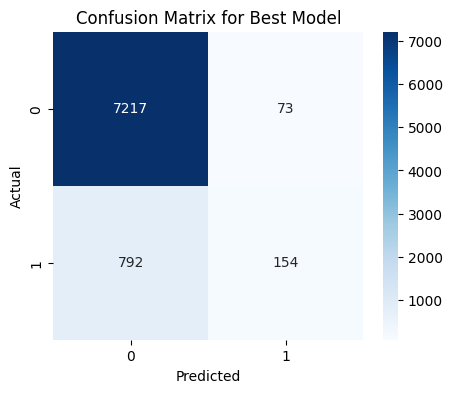

In [49]:
# Select the best dataset based on previous analysis
X_train_best = X_train_with_outliers_minmax_sel
X_test_best = X_test_with_outliers_minmax_sel
X_train_with_outliers_minmax_sel
# Hyperparameter tuning using GridSearchCV
hyperparameters = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports 'l1' and 'l2' penalties
}
model = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(model, hyperparameters, scoring='accuracy', cv=5)
grid_search.fit(X_train_best, y_train)

# Melhor modelo e seus hiperparâmetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluation of the fitted model on the test data
y_test_pred_best = best_model.predict(X_test_best)
test_accuracy = accuracy_score(y_test, y_test_pred_best)
print("Best model after hyperparameter tuning:")
print(f"Accuracy on the testing dataset: {test_accuracy}")
print(f"Optimal hyperparameter configuration: {best_params}")

# Confusion Matrix for the best model
cm = confusion_matrix(y_test, y_test_pred_best)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Best Model")
plt.show()

<br>

## **STEP 8: CONCLUSIONS**

<br>

# **STATEMENTS** 

- **True Negatives (TN)**: 7217 - Cases where the model correctly predicted that the customer would not take out the deposit (class 0).
- **False Positives (FP)**: 73 - Cases where the model incorrectly predicted that the customer would take out the deposit, but they did not (model error).
- **False Negatives (FN)**: 792 - Cases where the model incorrectly predicted that the customer would not take out the deposit, but they did (model error).
- **True Positives (TP)**: 154 - Cases where the model correctly predicted that the customer would take out the deposit (class 1).

<br>

# **CONCLUSIONS**

The model is more adept at correctly classifying customers who won't take out the deposit (class 0) than those who will (class 1). This implies that the model can be used to prioritize efforts on high-potential customers, but it may miss a substantial number of potential subscribers.

<br>

<br>

